<a href="https://colab.research.google.com/github/amolamahadik/Dissertation/blob/main/MA981.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import sklearn.metrics
from sklearn.metrics import confusion_matrix


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import random
import glob
import shutil
import matplotlib.pyplot as plt
import itertools

from time import time
from skimage import io



In [104]:

os.chdir('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data')
# datagen = ImageDataGenerator(        
#             rotation_range=10,
#             width_shift_range=0.092,  
#             height_shift_range=0.092,    
#             shear_range=0.09,        
#             zoom_range=0.095,        
#             horizontal_flip=True,         
#             fill_mode='constant',cval=125)



In [71]:
# image_directory='E:/MS UK/MA981/TB Dataset/TB_Chest_Radiography_Database/Tuberculosis/'
# SIZE=512


In [72]:
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):    
#    if (image_name.split('.')[1] == 'png'):        
#        image = plt.imread(image_directory + image_name)        
#        image = Image.fromarray(image, 'RGB')        
#        image = image.resize((SIZE,SIZE)) 
#        dataset.append(np.array(image))

In [73]:
# x = np.array(dataset)
# x.shape
# i = 0
# for batch in datagen.flow(x, batch_size=4,
#                            save_to_dir='E:/MS UK/MA981/TB Dataset/TB_Chest_Radiography_Database/Tuberculosis',
#                            save_prefix='TB_aug',
#                            save_format='png'):
#      i+=1
#      if i > 700: #Epochs
#          break


In [74]:
# os.chdir('E:/MS UK/MA981/TB Dataset')
# input_folder='TB_Chest_Radiography_Database/'

In [75]:
# splitfolders.ratio(input_folder,output="TB Data",
#                   seed=40,ratio=(.7, .2, .1),
#                   group_prefix=None)



#Seperating train, test and validation dataset

# if os.path.isdir('train/Normal') is False:
#     os.makedirs('train/Normal')
#     os.makedirs('train/TB')
    
    
#     os.makedirs('test/Normal')
#     os.makedirs('test/TB')
    
   
#     os.makedirs('valid/Normal')
#     os.makedirs('valid/TB')
    
    
#     for c in random.sample(glob.glob('N*.png'),2450):
#         shutil.move(c, 'train/Normal' )
#     for c in random.sample(glob.glob('T*.png'),2450):
#         shutil.move(c, 'train/TB' )
   
#     for c in random.sample(glob.glob('N*.png'),700):
#         shutil.move(c, 'valid/Normal' )
#     for c in random.sample(glob.glob('T*.png'),700):
#         shutil.move(c, 'valid/TB' )
   
    
#     for c in random.sample(glob.glob('N*.png'),350):
#         shutil.move(c, 'test/Normal' )
#     for c in random.sample(glob.glob('T*.png'),350):
#         shutil.move(c, 'test/TB' )
    


In [105]:
train_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/train')
valid_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/valid')
test_path=('/content/drive/MyDrive/TB Data.zip (Unzipped Files)/TB Data/test')

In [106]:
train_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=train_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=10,class_mode='binary')
valid_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=valid_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=10,class_mode='binary')
test_batches=ImageDataGenerator(rescale=1./255) \
                .flow_from_directory(directory=test_path,target_size=(512,512) ,classes=['Normal','TB'],
                                    batch_size=1,class_mode='binary',shuffle=False)



Found 4900 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [107]:
assert train_batches.n==4900
assert valid_batches.n==1400
assert test_batches.n==700

assert train_batches.num_classes==test_batches.num_classes==valid_batches.num_classes==2

print(train_batches.class_indices)
print(valid_batches.class_indices)
print(test_batches.class_indices)

{'Normal': 0, 'TB': 1}
{'Normal': 0, 'TB': 1}
{'Normal': 0, 'TB': 1}


In [108]:
def plot_training(applied_model):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(applied_model.history['accuracy'])
    plt.plot(applied_model.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(applied_model.history['loss'])
    plt.plot(applied_model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

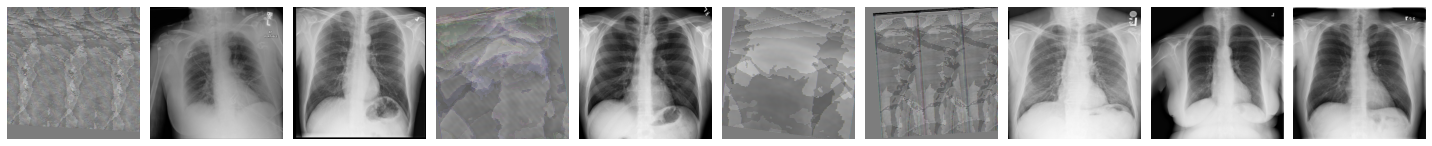

[1. 0. 0. 1. 0. 1. 1. 0. 0. 0.]


(10, 512, 512, 3)

In [109]:
imgs, labels=next(train_batches)
def plotImages(images_arr):
     fig,axes=plt.subplots(1,10,figsize=(20,20))
     axes=axes.flatten()
     for img,ax in zip(images_arr,axes):
         ax.imshow(img)
         ax.axis('off')
     plt.tight_layout()
     plt.show()
plotImages(imgs)
print(labels)
imgs.shape

In [81]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
checkpointer = ModelCheckpoint( filepath='saved_models/model_cnn.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [82]:

model=Sequential([Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',input_shape=(512,512,3)),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                 
                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),

                  Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                  
                  Flatten(), 
                  Dense(units=1,activation='sigmoid'),
                 ])
model.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 512, 512, 128)     3584      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 256, 256, 128)    0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 256, 256, 128)     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 128, 128, 128)    

In [83]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
model_cnn=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8112
Epoch 1: val_accuracy improved from -inf to 0.93071, saving model to saved_models/model_ann.hdf5
490/490 [==============================] - 3303s 7s/step - loss: 0.3928 - accuracy: 0.8112 - val_loss: 0.4567 - val_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1490 - accuracy: 0.9451
Epoch 2: val_accuracy improved from 0.93071 to 0.94929, saving model to saved_models/model_ann.hdf5
490/490 [==============================] - 156s 319ms/step - loss: 0.1490 - accuracy: 0.9451 - val_loss: 0.3873 - val_accuracy: 0.9493 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1219 - accuracy: 0.9520
Epoch 3: val_accuracy did not improve from 0.94929
490/490 [==============================] - 158s 322ms/step - loss: 0.1219 - accuracy: 0.9520 - val_loss: 0.3935 - val_accuracy: 0.9400 - lr: 1.0000e-04
Epoch 4/10

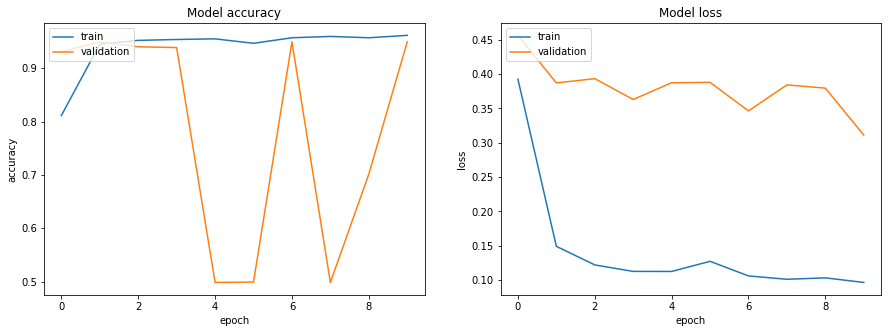

In [85]:
plot_training(model_cnn)

In [86]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/model_ann.hdf5')
score_cnn = model.evaluate(test_batches, verbose=1)
score_cnn

700/700 [==============================] - 579s 828ms/step - loss: 0.3882 - accuracy: 0.9514


[0.3882328271865845, 0.9514285922050476]

In [87]:

def vgg(input_shape, n_classes):
  input = Input(input_shape)
  x = Conv2D(64, 3, padding='same', activation='relu')(input)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(28, 3, padding='same', activation='relu')(x)
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)

  output = Dense(1, activation='sigmoid')(x)
  model = Model(input, output)
  return model




In [88]:
K.clear_session()
input_shape=(512,512,3)
n_classes=2
model=vgg(input_shape,n_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 28)      16156     
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 128)     32384     
                                                             

In [89]:
checkpointer = ModelCheckpoint( filepath='saved_models/VGG_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [90]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
# Training of CNN VGG 16 model with 10 epochs
VGG_model=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0.8759
Epoch 1: val_accuracy improved from -inf to 0.97143, saving model to saved_models/VGG_model.hdf5
490/490 [==============================] - 479s 960ms/step - loss: 0.2585 - accuracy: 0.8759 - val_loss: 0.0769 - val_accuracy: 0.9714 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9404
Epoch 2: val_accuracy did not improve from 0.97143
490/490 [==============================] - 431s 879ms/step - loss: 0.1735 - accuracy: 0.9404 - val_loss: 0.2756 - val_accuracy: 0.9614 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9569
Epoch 3: val_accuracy improved from 0.97143 to 0.99000, saving model to saved_models/VGG_model.hdf5
490/490 [==============================] - 466s 950ms/step - loss: 0.1117 - accuracy: 0.9569 - val_loss: 0.0377 - val_accuracy: 0.9900 - lr: 1.0000e-04
Epoch 4/

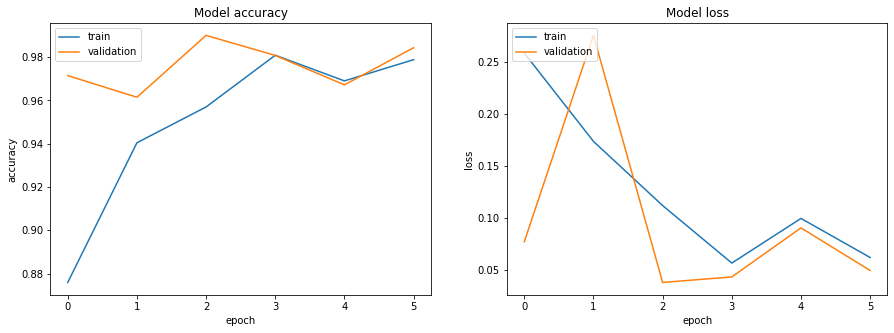

In [92]:
plot_training(VGG_model)

In [93]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/VGG_model.hdf5')
score_vgg = model.evaluate(test_batches, verbose=1)
score_vgg

700/700 [==============================] - 30s 40ms/step - loss: 0.0357 - accuracy: 0.9871


[0.03574291989207268, 0.9871428608894348]

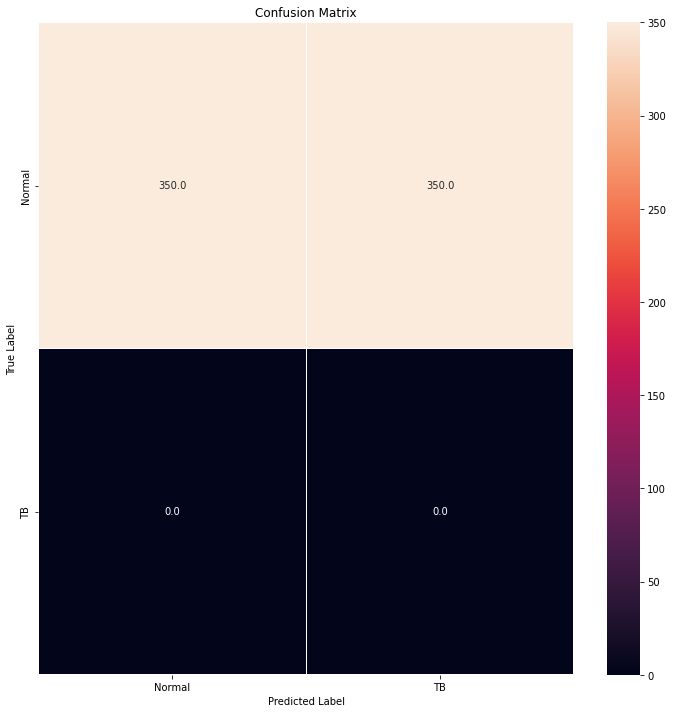

In [94]:
xray_labels=['Normal','TB']
from sklearn.metrics import classification_report
import seaborn as sns
Y_pred=model.predict(test_batches)
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_batches.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_batches.class_indices)
rice_labels = ['Normal','TB']
ax.yaxis.set_ticklabels(xray_labels)
plt.title("Confusion Matrix")
plt.show()

In [119]:
model=Sequential()
model.add(Flatten(input_shape=(512,512,3)))

model.add(Dense(128,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(128,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(256,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 786432)            0         
                                                                 
 dense_15 (Dense)            (None, 128)               100663424 
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 1)                

In [120]:
checkpointer = ModelCheckpoint( filepath='saved_models/ann_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [121]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
model_ann=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
490/490 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.9110
Epoch 1: val_accuracy improved from -inf to 0.96714, saving model to saved_models/ann_model.hdf5
490/490 [==============================] - 112s 227ms/step - loss: 0.3148 - accuracy: 0.9110 - val_loss: 0.0896 - val_accuracy: 0.9671 - lr: 1.0000e-04
Epoch 2/10
490/490 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9473
Epoch 2: val_accuracy did not improve from 0.96714
490/490 [==============================] - 114s 233ms/step - loss: 0.1717 - accuracy: 0.9473 - val_loss: 0.0829 - val_accuracy: 0.9671 - lr: 1.0000e-04
Epoch 3/10
490/490 [==============================] - ETA: 0s - loss: 0.1336 - accuracy: 0.9580
Epoch 3: val_accuracy improved from 0.96714 to 0.97071, saving model to saved_models/ann_model.hdf5
490/490 [==============================] - 117s 238ms/step - loss: 0.1336 - accuracy: 0.9580 - val_loss: 0.0802 - val_accuracy: 0.9707 - lr: 1.0000e-04
Epoch 4/

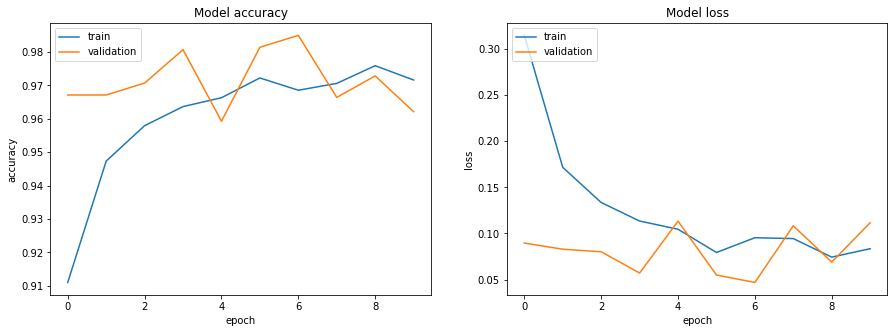

In [123]:
plot_training(model_ann)

In [124]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
model.load_weights('saved_models/ann_model.hdf5')
score_ann = model.evaluate(test_batches, verbose=1)
score_ann

700/700 [==============================] - 14s 20ms/step - loss: 0.0485 - accuracy: 0.9843


[0.048512302339076996, 0.9842857122421265]